# 1. Importación de librerias necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from scipy.stats import ttest_ind, f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 2. Carga del archivo de respuestas

1.   Elemento de lista
2.   Elemento de lista



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving RESPUESTAS.xlsx to RESPUESTAS.xlsx


In [ ]:
# Leer el archivo Excel con las respuestas de la encuesta
df = pd.read_excel("RESPUESTAS.xlsx", sheet_name="Hoja1")

# 3. Tipo de datos y nulos

In [ ]:
df.info()  # Ver tipos de datos y nulos
df.isna().sum()  # Ver cuántos nulos hay por columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 45 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   Marca temporal                                                                                      176 non-null    object 
 1   ¿Aceptas participar en esta encuesta y que tus respuestas sean utilizadas con los fines descritos?  176 non-null    object 
 2   Edad                                                                                                176 non-null    float64
 3   Género                                                                                              176 non-null    object 
 4   Universidad                                                                                         176 non-null    

,0
Marca temporal,1
¿Aceptas participar en esta encuesta y que tus respuestas sean utilizadas con los fines descritos?,1
Edad,1
Género,1
Universidad,1
Grado universitario,1
Curso actual,1
Ciudad donde estudias,1
Ciudad de residencia FAMILIAR,1
Nota media,1


# 4. Análisis descriptivo datos

In [ ]:
df.describe()

,Edad,Nota media,Exp_Internacional,¿Utilizas LinkedIn?,Publicaciones_LinkedIn,Contactos_LinkedIn,Utilidad_LinkedIn,Meses_prácticas,Num_Empresas,Tiempo_búsqueda,...,BF1,BF2,BF3,BF4,BF5,BF6,BF7,BF8,BF9,BF10
count,176.000000,176.000000,176.000000,177.000000,130.000000,130.000000,130.000000,176.000000,176.000000,175.000000,...,176.000000,176.000000,176.000000,176.000000,176.00000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,22.482955,7.658523,0.653409,1.468927,0.730769,378.153846,4.261538,5.349432,1.715909,1.745714,...,2.857955,3.420455,2.750000,3.244318,3.00000,3.806818,2.261364,3.664773,2.965909,3.528409
std,1.430183,0.803317,0.477242,9.725809,1.105227,227.156588,1.890629,5.689218,1.326209,1.953385,...,1.212904,1.022284,1.103242,1.101932,1.33951,0.983962,0.950120,0.917206,1.120702,1.100280
min,20.000000,5.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,22.000000,7.000000,0.000000,0.000000,0.000000,200.000000,3.000000,1.000000,1.000000,1.000000,...,2.000000,3.000000,2.000000,2.000000,2.00000,3.000000,2.000000,3.000000,2.000000,3.000000
50%,22.000000,7.655000,1.000000,1.000000,0.000000,397.500000,5.000000,4.500000,2.000000,1.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,4.000000,2.000000,4.000000,3.000000,4.000000
75%,23.000000,8.200000,1.000000,1.000000,1.000000,500.000000,6.000000,8.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,5.000000,3.000000,4.000000,4.000000,4.000000
max,28.000000,9.530000,1.000000,130.000000,7.000000,1000.000000,7.000000,48.000000,6.000000,15.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


# 5. Transformación de variables

In [ ]:
# Definimos el nombre exacto de la columna que contiene la situación laboral
col_laboral = "Situación laboral"

# Crear columnas binarias (1 si aplica, 0 si no) para cada tipo de situación laboral
df['busca_empleo'] = df[col_laboral].str.contains("Estoy buscando empleo", case=False, na=False).astype(int)
df['busca_practicas'] = df[col_laboral].str.contains("Estoy buscando prácticas", case=True, na=False).astype(int)
df['realiza_practicas'] = df[col_laboral].str.contains("Estoy realizando prácticas", case=False, na=False).astype(int)
df['primer_empleo_contrato'] = df[col_laboral].str.contains("Estoy en mi primer empleo con contrato laboral", case=False, na=False).astype(int)
df['trabaja_experiencia_previa'] = df[col_laboral].str.contains("Tengo experiencia laboral previa", case=False, na=False).astype(int)
df['no_busca_nada'] = df[col_laboral].str.contains("Actualmente no estoy buscando prácticas ni empleo", case=False, na=False).astype(int)

In [ ]:
# Suma de cada dummy para ver cuántos encuestados están en cada situación
df[['busca_empleo', 'busca_practicas', 'realiza_practicas',
    'primer_empleo_contrato', 'trabaja_experiencia_previa',
    'no_busca_nada']].sum()


,0
busca_empleo,26
busca_practicas,22
realiza_practicas,49
primer_empleo_contrato,31
trabaja_experiencia_previa,24
no_busca_nada,46


In [ ]:
#Recodificación de variables de USO DE LINKEDIN
# Recodificar horas como categorías ordinales
df['Horas_LinkedIn_num'] = df['Horas_LinkedIn'].map({
    'Menos de 1 hora a la semana': 1,
    'Entre 1 y 2 horas a la semana': 2,
    'Entre 2 y 3 horas a la semana': 3,
    'Entre 3 y 4 horas a la semana': 4,
    'Más de 5 horas a la semana': 5
})


# Comentarios
df['Comentarios_LinkedIn_num'] = df['Comentarios_LinkedIn'].map({
    'Menos de 10': 5,
    'Entre 10 y 20': 15,
    'Entre 20 y 30': 25,
    'Más de 30': 30
})



In [ ]:

#Transformar cuso actual a numérico
curso_map = {
    "1º": 1,
    "2º": 2,
    "3º": 3,
    "4º": 4,
    "5º": 5,
    "6º": 6,
    "Ya he terminado mis estudios": 7
}

# Aplicar la transformación
df["curso_actual_num"] = df["Curso actual"].map(curso_map)

#Recodificar género como binaria (0=Masculino, 1=Femenino)
df['Genero'] = df['Género'].map({'Masculino': 0, 'Femenino': 1})

#Transformar número de procesos en numérica
procesos_map = {
    "Ninguno": 0,
    "Menos de 5": 3,
    "Entre 5 y 10": 7,
    "Entre 10 y 20": 15,
    "Entre 20 y 30": 25,
    "Más de 30": 35
}

df["procesos_busqueda_num"] = df["Procesos"].map(procesos_map)

# 6. Construcción de índices

In [ ]:
#CONSTRUCCIÓN DE ÍNDICES PSICOLÓGICOS
# Invertir ítems reverse-scored
df['A1_rev'] = 6 - df['A1']
df['A5_rev'] = 6 - df['A5']
df['A7_rev'] = 6 - df['A7']

# Calcular índice de ansiedad (media de los 7 ítems corregidos)
df['job_anxiety'] = df[['A1_rev', 'A2', 'A3', 'A4', 'A5_rev', 'A6', 'A7_rev']].mean(axis=1)


In [ ]:
#ÍNDICE NEUROTICISMO Y CONCIENCIA
# Invertir ítems que lo necesitaN
df['BF3_rev'] = 6 - df['BF3']
df['BF4_rev'] = 6 - df['BF4']

# Calcular índice de Conciencia
df['conciencia'] = df[['BF3_rev', 'BF8']].mean(axis=1)

# Calcular índice de Neuroticismo
df['neuroticismo'] = df[['BF4_rev', 'BF9']].mean(axis=1)



#7. Estandarización de variables numéricas

In [ ]:

from sklearn.preprocessing import StandardScaler

control_vars = [
    'Edad', 'Genero', 'curso_actual_num', 'procesos_busqueda_num',
    'Meses_prácticas', 'Num_Empresas', 'Tiempo_búsqueda', 'Preparación_entrevistas',
    '¿Utilizas LinkedIn?', 'Exp_Internacional', 'Nota media'
]

# Estandarización
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df[control_vars]),
    columns=[var + '_z' for var in control_vars]
)

# Combinar con el dataframe original
df = pd.concat([df, df_scaled], axis=1)

# Estandarizar también los índices de personalidad
df[['conciencia_z', 'neuroticismo_z']] = scaler.fit_transform(df[['conciencia', 'neuroticismo']])



#8. Cálculo de índice compuesto de uso de LinkedIn

In [ ]:
#Nos quedamos con quienes usan LinkedIn
df_linkedin = df[df['¿Utilizas LinkedIn?'] == 1].copy()
df_linkedin['Indice_Uso_LinkedIn'] = df_linkedin[['Horas_LinkedIn_num',
                                        'Comentarios_LinkedIn_num',
                                        'Publicaciones_LinkedIn',
                                        'Contactos_LinkedIn']].mean(axis=1)

df_linkedin['Indice_Uso_LinkedIn_z'] = scaler.fit_transform(df_linkedin[['Indice_Uso_LinkedIn']])

# 9. Análisis descriptivo general y por subgrupos

1. Analisis descriptivo

In [ ]:
# Lista de variables a incluir en las tablas descriptiva
variables = [
    'job_anxiety', 'Edad', 'Genero', 'curso_actual_num', 'procesos_busqueda_num',
    'Meses_prácticas', 'Num_Empresas', 'Tiempo_búsqueda', 'Preparación_entrevistas',
    'conciencia', 'neuroticismo',
    'Exp_Internacional', 'busca_empleo', 'busca_practicas', 'realiza_practicas',
    'primer_empleo_contrato', 'trabaja_experiencia_previa',
    'no_busca_nada', 'Indice_Uso_LinkedIn'
]

# Tabla descriptiva para toda la muestra (sin la variable específica de LinkedIn)
variables_sin_linkedin = [v for v in variables if v != 'Indice_Uso_LinkedIn']
descriptiva_general = df[variables_sin_linkedin].describe().T
descriptiva_general.rename(columns={'mean': 'Media', 'std': 'Desviación típica'}, inplace=True)
descriptiva_general = descriptiva_general.round(2)


# Mostrar tabla
display(descriptiva_general)


,count,Media,Desviación típica,min,25%,50%,75%,max
job_anxiety,176.0,2.98,0.85,1.29,2.29,3.0,3.71,4.86
Edad,176.0,22.48,1.43,20.00,22.00,22.0,23.00,28.00
Genero,176.0,0.76,0.43,0.00,1.00,1.0,1.00,1.00
curso_actual_num,176.0,5.25,1.62,1.00,4.00,5.0,7.00,7.00
procesos_busqueda_num,176.0,7.52,9.72,0.00,3.00,3.0,7.00,35.00
Meses_prácticas,176.0,5.35,5.69,0.00,1.00,4.5,8.00,48.00
Num_Empresas,176.0,1.72,1.33,0.00,1.00,2.0,3.00,6.00
Tiempo_búsqueda,175.0,1.75,1.95,0.00,1.00,1.0,3.00,15.00
Preparación_entrevistas,175.0,4.37,1.76,1.00,3.00,5.0,6.00,7.00
conciencia,176.0,3.46,0.78,1.50,3.00,3.5,4.00,5.00


In [ ]:
# Tabla descriptiva para quienes usan LinkedIn (con todas las variables)
descriptiva_linkedin = df_linkedin[variables].describe().T
descriptiva_linkedin.rename(columns={'mean': 'Media', 'std': 'Desviación típica'}, inplace=True)
descriptiva_linkedin = descriptiva_linkedin.round(2)

display(descriptiva_linkedin)

,count,Media,Desviación típica,min,25%,50%,75%,max
job_anxiety,130.0,2.94,0.86,1.29,2.29,2.86,3.71,4.57
Edad,130.0,22.68,1.38,20.00,22.00,22.00,23.00,28.00
Genero,130.0,0.75,0.44,0.00,0.25,1.00,1.00,1.00
curso_actual_num,130.0,5.64,1.46,1.00,5.00,5.00,7.00,7.00
procesos_busqueda_num,130.0,9.15,10.44,0.00,3.00,7.00,7.00,35.00
Meses_prácticas,130.0,6.43,6.08,0.00,2.00,6.00,9.00,48.00
Num_Empresas,130.0,1.87,1.27,0.00,1.00,2.00,3.00,6.00
Tiempo_búsqueda,130.0,2.11,2.05,0.00,1.00,2.00,3.00,15.00
Preparación_entrevistas,130.0,4.70,1.51,1.00,4.00,5.00,6.00,7.00
conciencia,130.0,3.52,0.77,1.50,3.00,3.50,4.00,5.00


2. Resumen estadístico de variables clave



In [ ]:
# Estadísticos básicos de las variables clave
df_linkedin[['Indice_Uso_LinkedIn_z', 'job_anxiety', 'neuroticismo_z', 'conciencia_z']].describe()

,Indice_Uso_LinkedIn_z,job_anxiety,neuroticismo_z,conciencia_z
count,1.300000e+02,130.000000,130.000000,130.000000
mean,-4.782499e-17,2.941758,-0.040344,0.084081
std,1.003868e+00,0.863523,0.996328,0.981989
min,-1.676376e+00,1.285714,-1.990312,-2.505355
25%,-7.905752e-01,2.285714,-0.920709,-0.585431
50%,7.549205e-02,2.857143,-0.118507,0.054543
75%,5.293551e-01,3.714286,0.683695,0.694518
max,2.726316e+00,4.571429,2.288099,1.974467


3. Correlaciones

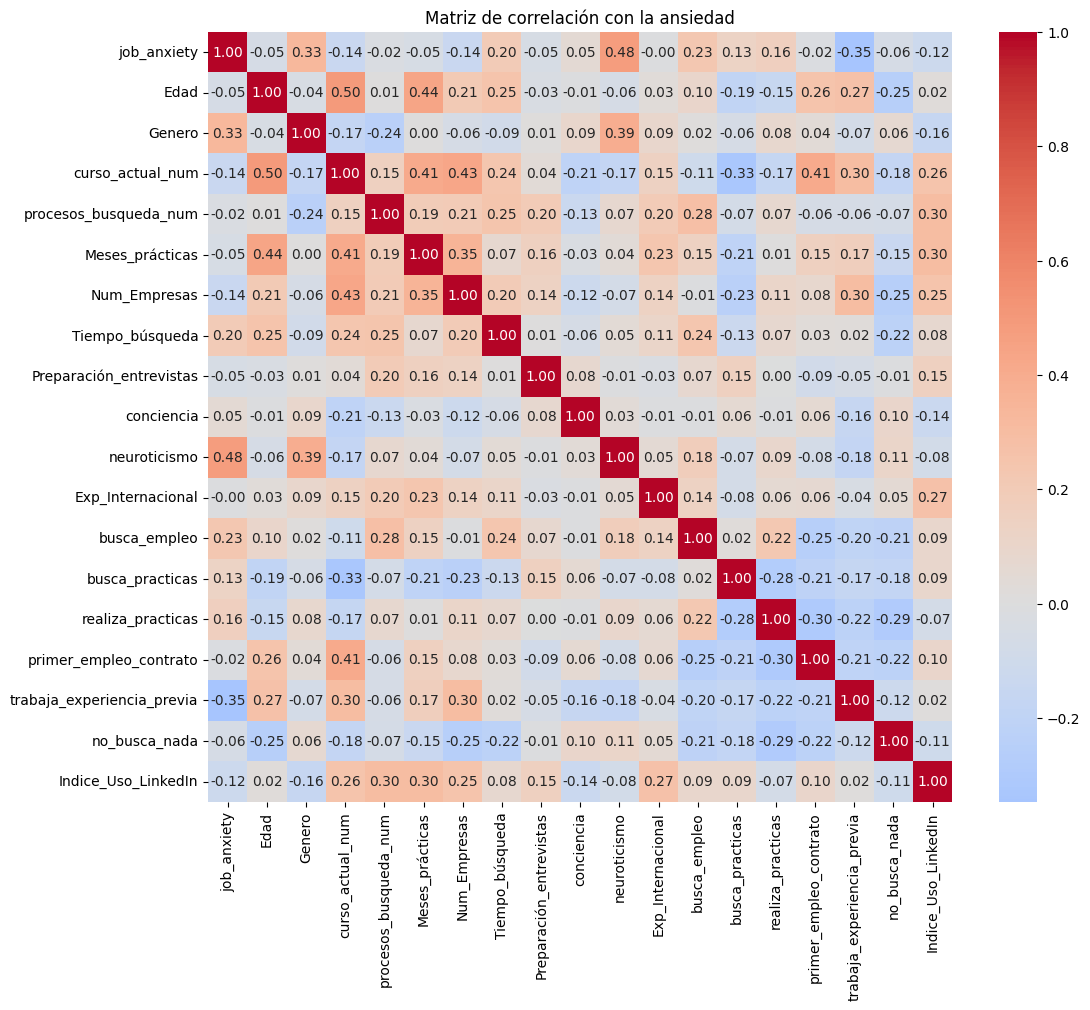

In [ ]:
# Variables a incluir en el análisis de correlación
variables_corr = [
    'job_anxiety',  # Dependiente
    'Edad', 'Genero', 'curso_actual_num', 'procesos_busqueda_num',
    'Meses_prácticas', 'Num_Empresas', 'Tiempo_búsqueda', 'Preparación_entrevistas',
    'conciencia', 'neuroticismo',
    'Exp_Internacional', 'busca_empleo', 'busca_practicas', 'realiza_practicas',
    'primer_empleo_contrato', 'trabaja_experiencia_previa',
    'no_busca_nada',
    'Indice_Uso_LinkedIn'  # Variable independiente principal
]

# Calcular matriz de correlación
corr_matrix = df_linkedin[variables_corr].corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Matriz de correlación con la ansiedad")
plt.show()


# 10. ANOVA y ANCOVA para evaluar la ansiedad laboral en función del uso de LinkedIn

In [ ]:

# Crear la variable categórica binaria: uso alto de LinkedIn
df_linkedin['uso_alto'] = df_linkedin['Indice_Uso_LinkedIn_z'] >= df_linkedin['Indice_Uso_LinkedIn_z'].median()

# ANOVA simple: efecto del uso alto sobre la ansiedad laboral
modelo_anova = ols('job_anxiety ~ C(uso_alto)', data=df_linkedin).fit()
anova_table = sm.stats.anova_lm(modelo_anova, typ=2)

print(anova_table)


                sum_sq     df         F    PR(>F)
C(uso_alto)   0.012716    1.0  0.016923  0.896701
Residual     96.178964  128.0       NaN       NaN


In [ ]:
# ANCOVA: controlar por conciencia y neuroticismo
modelo_ancova = ols('job_anxiety ~ C(uso_alto) + conciencia_z + neuroticismo_z', data=df_linkedin).fit()
ancova_table = sm.stats.anova_lm(modelo_ancova, typ=2)

print(ancova_table)


                   sum_sq     df          F        PR(>F)
C(uso_alto)      0.005248    1.0   0.008985  9.246309e-01
conciencia_z     0.119547    1.0   0.204681  6.517468e-01
neuroticismo_z  22.325564    1.0  38.224465  8.084426e-09
Residual        73.592163  126.0        NaN           NaN


#11. Clustering con K-Means

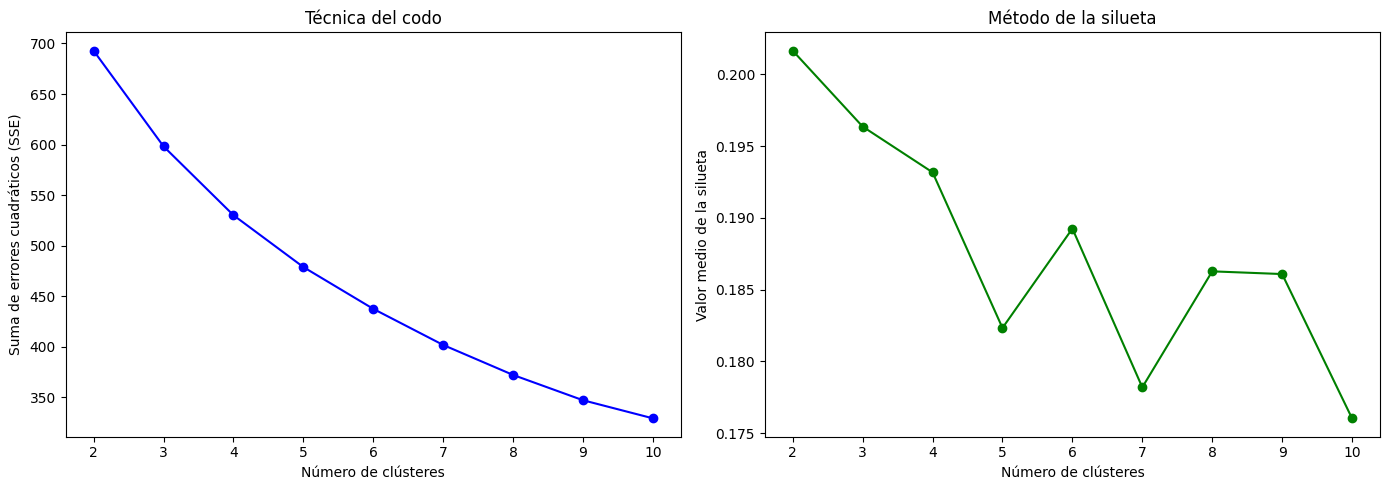

k = 2: SSE = 692.86 | Silhouette = 0.202
k = 3: SSE = 598.25 | Silhouette = 0.196
k = 4: SSE = 530.17 | Silhouette = 0.193
k = 5: SSE = 478.87 | Silhouette = 0.182
k = 6: SSE = 437.51 | Silhouette = 0.189
k = 7: SSE = 401.80 | Silhouette = 0.178
k = 8: SSE = 372.14 | Silhouette = 0.186
k = 9: SSE = 347.12 | Silhouette = 0.186
k = 10: SSE = 329.22 | Silhouette = 0.176


In [ ]:
# Variables seleccionadas para clustering
variables_cluster = [
    'job_anxiety',
    'conciencia',
    'neuroticismo',
    'Meses_prácticas',
    'Preparación_entrevistas'
]

# Filtrar datos válidos (sin NaNs)
X = df[variables_cluster].dropna()

# Estandarizar variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Función para calcular SSE (codo) y silueta
def calcular_metricas_kmeans(X, max_k=10):
    sse = []
    sil_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, n_init=25, random_state=42)
        labels = kmeans.fit_predict(X)
        sse.append(kmeans.inertia_)
        sil_scores.append(silhouette_score(X, labels))
    return sse, sil_scores

# Calcular métricas
sse, sil_scores = calcular_metricas_kmeans(X_scaled)

# Visualización de los resultados
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Técnica del codo
ax[0].plot(range(2, 11), sse, marker='o', color='blue')
ax[0].set_title("Técnica del codo")
ax[0].set_xlabel("Número de clústeres")
ax[0].set_ylabel("Suma de errores cuadráticos (SSE)")

# Método de la silueta
ax[1].plot(range(2, 11), sil_scores, marker='o', color='green')
ax[1].set_title("Método de la silueta")
ax[1].set_xlabel("Número de clústeres")
ax[1].set_ylabel("Valor medio de la silueta")

plt.tight_layout()
plt.show()

# Mostrar valores numéricos para justificar elección de k
for i, (s, sil) in enumerate(zip(sse, sil_scores), start=2):
    print(f"k = {i}: SSE = {s:.2f} | Silhouette = {sil:.3f}")



In [ ]:
# Entrenamiento final con k=3
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=25, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Creamos un DataFrame con los datos originales filtrados
df_cluster = df.loc[X.index, variables_cluster].copy()

# Asignamos los clústeres
df_cluster['cluster'] = clusters



In [ ]:
# Visualizamos nº de obervaciones por cluster
print(df_cluster['cluster'].value_counts())


cluster
1    82
0    55
2    38
Name: count, dtype: int64


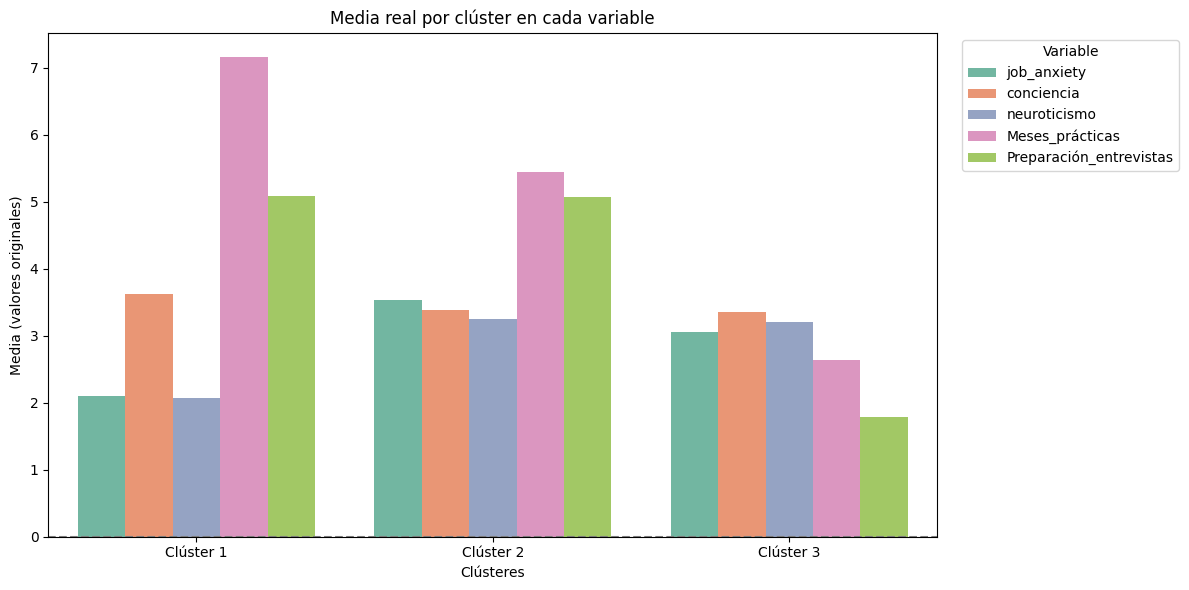

In [ ]:
#GRÁFICO DE MEDIAS POR CLÚSTER EN CADA VARIABLE

# 1. Añadir columna de clúster como texto
medias_reales = df_cluster.groupby('cluster')[X.columns].mean().reset_index()
medias_reales['Clúster'] = medias_reales['cluster'].apply(lambda x: f'Clúster {x+1}')
medias_reales = medias_reales.drop(columns='cluster')

# 2. Pasar a formato largo para graficar con seaborn
medias_long = pd.melt(medias_reales, id_vars='Clúster', var_name='Variable', value_name='Valor')

# 3. Gráfico: eje X = clústeres, una barra por variable
plt.figure(figsize=(12, 6))
sns.barplot(data=medias_long, x='Clúster', y='Valor', hue='Variable', palette='Set2')
plt.title("Media real por clúster en cada variable")
plt.ylabel("Media (valores originales)")
plt.xlabel("Clústeres")
plt.axhline(0, color='gray', linestyle='--')
plt.legend(title='Variable', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()



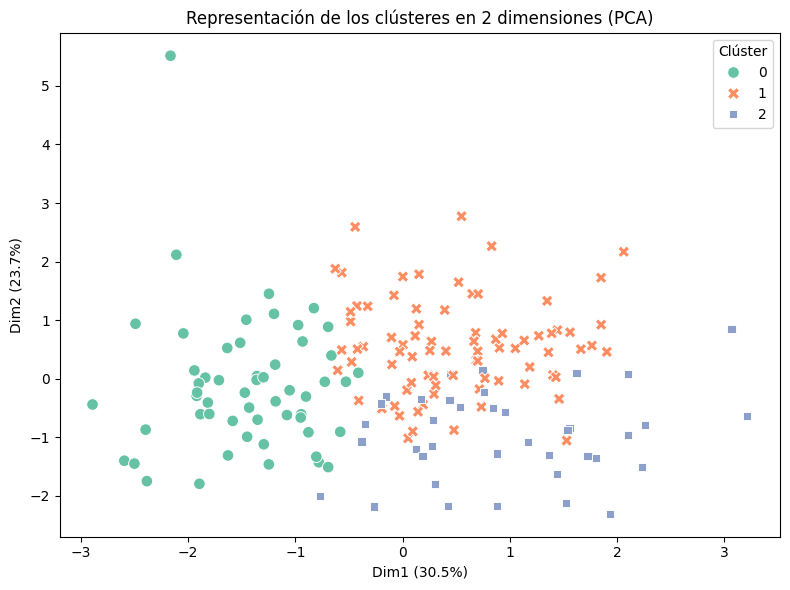

In [ ]:
# 1. Aplicar PCA sobre los datos estandarizados (X_scaled)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 2. Crear DataFrame con las dos componentes principales
df_pca = pd.DataFrame(X_pca, columns=['Dim1', 'Dim2'])

# 3. Añadir las etiquetas de clúster desde el modelo KMeans (ya entrenado con k=3)
df_pca['Cluster'] = clusters.astype(str)  # clusters ya calculado antes

# 4. Visualizar
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_pca, x='Dim1', y='Dim2',
    hue='Cluster', palette='Set2',
    style='Cluster', s=70
)
plt.title('Representación de los clústeres en 2 dimensiones (PCA)')
plt.xlabel(f"Dim1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"Dim2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend(title='Clúster')
plt.tight_layout()
plt.show()



In [ ]:
#Medias por cluster
medias_por_cluster = df_cluster.groupby('cluster')[X.columns].mean().T
display(medias_por_cluster)


cluster,0,1,2
job_anxiety,2.103896,3.536585,3.052632
conciencia,3.618182,3.390244,3.355263
neuroticismo,2.063636,3.256098,3.210526
Meses_prácticas,7.163636,5.439024,2.631579
Preparación_entrevistas,5.090909,5.073171,1.789474


# 12. Modelo de Regresión Lineal Múltiple


In [ ]:
# Seleccionar variables relevantes
vars_continuas = ['Indice_Uso_LinkedIn', 'neuroticismo', 'conciencia', 'Tiempo_búsqueda', 'Preparación_entrevistas']
vars_dummies = ['Genero', 'curso_actual_num', 'busca_empleo', 'busca_practicas', 'trabaja_experiencia_previa']
target = 'job_anxiety'

# Crear un DataFrame con solo las variables necesarias
vars_modelo = vars_continuas + vars_dummies + [target]
df_modelo = df_linkedin[vars_modelo].dropna().copy()


In [ ]:
#Estandarizamos
scaler = StandardScaler()
for var in vars_continuas:
    df_modelo[f"{var}_z"] = scaler.fit_transform(df_modelo[[var]])


In [ ]:
#Creamos relaciones de interacción
df_modelo['uso_x_neuroticismo'] = df_modelo['Indice_Uso_LinkedIn_z'] * df_modelo['neuroticismo_z']
df_modelo['uso_x_conciencia'] = df_modelo['Indice_Uso_LinkedIn_z'] * df_modelo['conciencia_z']


In [ ]:
# Definir variables predictoras
X_vars = [
    'Indice_Uso_LinkedIn_z', 'neuroticismo_z', 'conciencia_z',
    'uso_x_neuroticismo', 'uso_x_conciencia',
    'Genero', 'curso_actual_num', 'Tiempo_búsqueda_z',
    'busca_empleo', 'busca_practicas', 'trabaja_experiencia_previa'
]

X = df_modelo[X_vars]
X = sm.add_constant(X)  # añade constante (intercepto)
y = df_modelo['job_anxiety']

# Ajustar modelo
modelo_completo = sm.OLS(y, X).fit()

# Mostrar resultados
print(modelo_completo.summary())


                            OLS Regression Results                            
Dep. Variable:            job_anxiety   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     7.958
Date:                Sun, 18 May 2025   Prob (F-statistic):           3.13e-10
Time:                        17:25:42   Log-Likelihood:                -128.81
No. Observations:                 130   AIC:                             281.6
Df Residuals:                     118   BIC:                             316.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               